<a href="https://colab.research.google.com/github/JosephGeorgeMtech/Flowers_Classification_CNN/blob/main/Flowers_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/Flowers_CNN')

In [3]:
pwd()


'/content/drive/MyDrive/Flowers_CNN'

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

In [5]:
import numpy as np
np.random.seed(42)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import glob
import PIL
from PIL import Image

In [8]:
! unzip '/content/drive/MyDrive/Flowers_CNN/Flower_dataset.zip' -d '/content/drive/MyDrive/Flowers_CNN'

Archive:  /content/drive/MyDrive/Flowers_CNN/Flower_dataset.zip
replace /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1265350143_6e2b276ec9.jpg  

In [9]:
imgFiles = glob.glob("/content/drive/MyDrive/Flowers_CNN/tiny_FR/*/*.jpg")
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg


In [10]:
type(imgFiles)

list

In [11]:
print(imgFiles)

['/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/147068564_32bb4350cc.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/154332674_453cea64f4.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/153210866_03cc9f2f36.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1354396826_2868631432_m.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1299501272_5

In [12]:
print(len(imgFiles))

500


In [13]:
X = []
y = []

In [14]:
for fName in imgFiles:
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i)/255.0   #Normalizing the X between 0 and 1, i.e converting 0 to 255 values of each pixel between 0 and 1 
  X.append(X_i)
  label = fName.split("/")
  y_i = label[6]
  y.append(y_i)

In [15]:
#for fName in imgFiles:
#  label = fName.split("/")  # to check the label's position inside directory
#label

In [16]:
X

[array([[[0.04705882, 0.15686275, 0.0627451 ],
         [0.04313725, 0.15294118, 0.0627451 ],
         [0.04705882, 0.15686275, 0.06666667],
         ...,
         [0.19607843, 0.12941176, 0.10588235],
         [0.18823529, 0.11764706, 0.10588235],
         [0.18823529, 0.11764706, 0.10588235]],
 
        [[0.05098039, 0.16078431, 0.07058824],
         [0.04705882, 0.15686275, 0.06666667],
         [0.05098039, 0.16078431, 0.07058824],
         ...,
         [0.19607843, 0.1254902 , 0.10588235],
         [0.19607843, 0.11372549, 0.11372549],
         [0.19607843, 0.11764706, 0.11372549]],
 
        [[0.05490196, 0.16470588, 0.0745098 ],
         [0.05490196, 0.16470588, 0.0745098 ],
         [0.05882353, 0.16862745, 0.07843137],
         ...,
         [0.2       , 0.1254902 , 0.10588235],
         [0.19607843, 0.11764706, 0.10588235],
         [0.19607843, 0.12156863, 0.10980392]],
 
        ...,
 
        [[0.        , 0.03921569, 0.00784314],
         [0.01176471, 0.04313725, 0.01568

In [17]:
print(y)

['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [18]:
print(len(y))

500


In [19]:
print(set(y))

{'daisy', 'rose', 'dandelion', 'sunflower', 'tulip'}


In [20]:
# converting the categorical label from text to number 
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

In [21]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [22]:
print(set(y))

{0, 1, 2, 3, 4}


In [23]:
print(lEncoder.classes_)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(500, 299, 299, 3)

In [26]:
y.shape

(500,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [28]:
print("X_train_shape: {}".format(X_train.shape))

X_train_shape: (400, 299, 299, 3)


In [29]:
print("X_test_shape: {}".format(X_test.shape))

X_test_shape: (100, 299, 299, 3)


In [30]:
print("y_train_shape: {}".format(y_train.shape))

y_train_shape: (400,)


In [31]:
print("y_test_shape: {}".format(y_test.shape))

y_test_shape: (100,)


In [32]:
#Manual standard-scalar the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu)/std   #apply feature scaling to X_train
X_test_std = (X_test - mu)/std     #apply feature scaling to X_test

In [37]:
print(X_train_std.shape)
print(X_train_std.shape[0])
print(X_train_std.shape[:2])
print(X_train_std.shape[1:])

(400, 299, 299, 3)
400
(400, 299)
(299, 299, 3)


In [56]:
input = tf.keras.layers.Input(shape = X_train_std.shape[1:])

x = tf.keras.layers.Conv2D(filters = 128,kernel_size=5,padding='same',activation='relu') (input)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Conv2D(filters = 256,kernel_size=3,padding='same',activation='relu') (x)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(units = 50, activation='relu') (x)
x = tf.keras.layers.Dense(units = 50, activation='relu') (x)

output = tf.keras.layers.Dense(units = 5, activation='softmax') (x)


In [57]:
model_CNN = tf.keras.models.Model(inputs = [input], outputs=[output])

In [58]:
model_CNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 299, 299, 128)     9728      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 149, 149, 256)     295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1401856)           0   

In [59]:
model_CNN.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


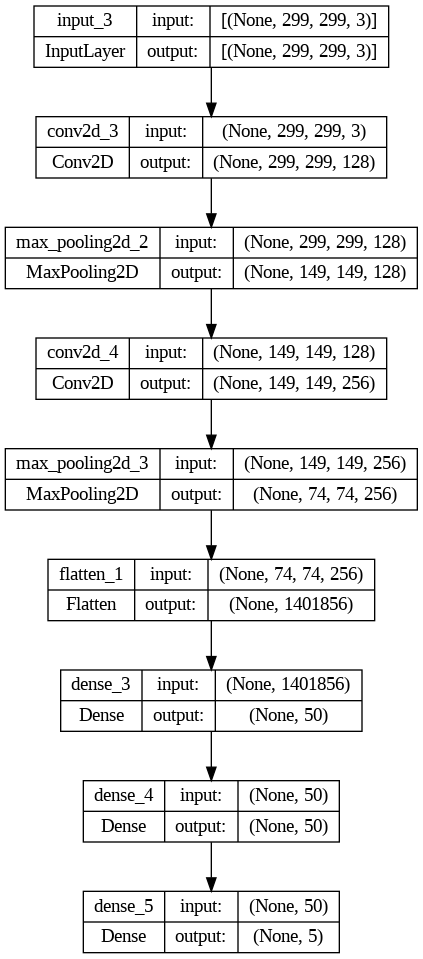

In [60]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [61]:
history_CNN = model_CNN.fit(x=X_train_std,y=y_train,epochs=50,validation_split=0.1,batch_size=32)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 10s 470ms/step - loss: 11.0072 - accuracy: 0.2278 - val_loss: 1.6396 - val_accuracy: 0.2000
Epoch 2/50
12/12 [==============================] - 4s 349ms/step - loss: 1.4830 - accuracy: 0.2528 - val_loss: 1.4283 - val_accuracy: 0.3500
Epoch 3/50
12/12 [==============================] - 4s 348ms/step - loss: 1.3412 - accuracy: 0.4111 - val_loss: 1.4033 - val_accuracy: 0.3250
Epoch 4/50
12/12 [==============================] - 4s 358ms/step - loss: 1.2889 - accuracy: 0.4306 - val_loss: 1.4110 - val_accuracy: 0.3500
Epoch 5/50
12/12 [==============================] - 4s 346ms/step - loss: 1.2148 - accuracy: 0.4917 - val_loss: 1.4481 - val_accuracy: 0.3500
Epoch 6/50
12/12 [==============================] - 4s 345ms/step - loss: 1.1635 - accuracy: 0.5028 - val_loss: 1.4199 - val_accuracy: 0.3750
Epoch 7/50
12/12 [==============================] - 4s 345ms/step - loss: 1.1072 - accuracy: 0.5333 - val_loss: 1.4419 - val_accuracy: 0.3750
Epoch 8/50
12/1

In [62]:
history_CNN.history.items()

dict_items([('loss', [11.007245063781738, 1.4830012321472168, 1.3411906957626343, 1.2888554334640503, 1.2148138284683228, 1.1635493040084839, 1.1072237491607666, 1.0744675397872925, 0.96544349193573, 0.9698512554168701, 0.8904913067817688, 0.7637752890586853, 0.3704494833946228, 0.2264605462551117, 0.09491606056690216, 0.03952699899673462, 0.019737424328923225, 0.00819153618067503, 0.004683727864176035, 0.0022281461860984564, 0.0016349360812455416, 0.0012159196194261312, 0.000874481163918972, 0.0007069004932418466, 0.0005958931287750602, 0.0005154955433681607, 0.0004498347989283502, 0.0004040855565108359, 0.0003745971480384469, 0.00032515981001779437, 0.0002954652882181108, 0.00026815367164090276, 0.00024245178792625666, 0.0002222507755504921, 0.00020564885926432908, 0.00019208791491109878, 0.00017944665160030127, 0.00016795785631984472, 0.00015882849402260035, 0.00014998618280515075, 0.0001403010101057589, 0.00013375782873481512, 0.00012655700265895575, 0.00012005327153019607, 0.00011

In [64]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

In [65]:
print(progress)

{'accuracy': [0.22777777910232544, 0.2527777850627899, 0.41111111640930176, 0.4305555522441864, 0.49166667461395264, 0.5027777552604675, 0.5333333611488342, 0.5416666865348816, 0.5722222328186035, 0.6083333492279053, 0.6638888716697693, 0.7638888955116272, 0.8861111402511597, 0.9361110925674438, 0.9861111044883728, 0.9888888597488403, 0.9972222447395325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_accuracy': [0.20000000298023224, 0.3499999940395355, 0.32499998807907104, 0.3499999940395355, 0.3499999940395355, 0.375, 0.375, 0.375, 0.42500001192092896, 0.3499999940395355, 0.42500001192092896, 0.5, 0.375, 0.375, 0.42500001192092896, 0.4000000059604645, 0.4749999940395355, 0.5, 0.5249999761581421, 0.5, 0.5249999761581421, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.5500000119

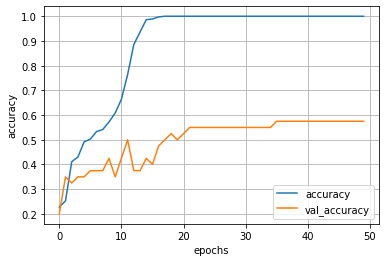

In [66]:
import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [71]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(X_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 1s 221ms/step - loss: 5.6831 - accuracy: 0.4400
Test-loss: 5.683113, Test-accuracy: 0.440000


In [72]:
cProba = model_CNN.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 1s 718ms/step
[[8.5761556e-03 9.9142390e-01 2.3250769e-10 4.0775268e-09 4.6205049e-09]
 [8.4659732e-06 7.8879455e-03 4.2411425e-08 9.9210358e-01 1.8774513e-10]
 [5.0650007e-04 2.3198476e-02 3.1310956e-03 9.7315603e-01 7.9159245e-06]
 [2.4518944e-01 7.5481039e-01 4.0397012e-08 2.3342833e-08 1.2699628e-07]
 [5.9759900e-02 9.4023991e-01 7.7931519e-09 4.5195208e-08 1.9412347e-07]
 [1.7616706e-03 9.9823242e-01 1.5191001e-06 3.8624171e-06 6.2904900e-07]
 [5.0616335e-02 9.2948431e-01 3.4898031e-07 1.9899050e-02 6.3002612e-09]
 [1.5190204e-16 2.2140180e-24 9.9843174e-01 4.1339667e-15 1.5681859e-03]
 [5.8637877e-08 5.7016492e-05 6.7540527e-06 9.9993610e-01 2.2102766e-09]
 [5.8031706e-08 5.1200023e-11 9.9860567e-01 4.0985068e-07 1.3939922e-03]]


In [73]:
cLabel = np.argmax(cProba,axis=-1) #returns index of highest probability value

print(cLabel)

[1 3 3 1 1 1 1 2 3 2]


In [74]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]


Exercise

    Change hyperparameters(epochs, dense units, kernel size, filter #)
    Add convolution layers, Filters etc...
